<h1 style="text-align: center">
Project 2 - Shubhan Chari: NBA Player Data
<div style="font-size: 50%">Dataset from <a href="https://www.basketball-reference.com/leagues/NBA_2024_per_game.html">basketball-reference.com
</h1>

<hr style="color: #DD3403;">

# Section 1: Dataset

I picked a couple datasets of the season statistics of every NBA player that played in the 2023-2024 NBA season (the previous season since this one is still ongoing). I love watching and playing basketball, and the statistics and analytical portion of the sport really interests me. As a result, I decided to look at NBA Player Data for this project. I picked 2 datasets: one for the regular season per game stats and one for total stats, but I will use the per game stats more.

Datasets from: <a href="https://www.basketball-reference.com/leagues/NBA_2024_per_game.html">basketball-reference.com

In [701]:
#load the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 15)
# I want to see all columns

df = pd.read_csv("2023-24 NBA Player Stats Per Game.csv")
df_totals = pd.read_csv("2023-24 NBA Player Stats Totals.csv")

In [702]:
# First, I'm dropping the rank and player-additional columns since we don't need them.
df = df.drop(columns=["Rk", "Player-additional"])
df_totals = df_totals.drop(columns=["Rk", "Player-additional"])
df.head(10)

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,Precious Achiuwa,24,2TM,PF,74,18,21.9,3.2,6.3,0.501,0.4,1.3,0.268,2.8,5.0,0.562,0.529,0.9,1.5,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6,NaN
1,Precious Achiuwa,24,TOR,C,25,0,17.5,3.1,6.8,0.459,0.5,1.9,0.277,2.6,4.9,0.528,0.497,1.0,1.7,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7,NaN
2,Precious Achiuwa,24,NYK,PF,49,18,24.2,3.2,6.1,0.525,0.3,1.0,0.260,2.9,5.1,0.578,0.547,0.9,1.4,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6,NaN
3,Bam Adebayo,26,MIA,C,71,71,34.0,7.5,14.3,0.521,0.2,0.6,0.357,7.3,13.7,0.528,0.529,4.1,5.5,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3,DPOY-3 AS
4,Ochai Agbaji,23,2TM,SG,78,28,21.0,2.3,5.6,0.411,0.8,2.7,0.294,1.5,2.8,0.523,0.483,0.5,0.7,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8,NaN
5,Ochai Agbaji,23,UTA,SG,51,10,19.7,2.1,4.9,0.426,0.9,2.8,0.331,1.2,2.1,0.551,0.520,0.3,0.4,0.750,0.7,1.8,2.5,0.9,0.5,0.6,0.7,1.3,5.4,NaN
6,Ochai Agbaji,23,TOR,SG,27,18,23.6,2.7,6.8,0.391,0.6,2.6,0.217,2.1,4.3,0.496,0.432,0.8,1.3,0.611,1.4,1.9,3.3,1.3,0.7,0.6,1.1,1.9,6.7,NaN
7,Santi Aldama,23,MEM,PF,61,35,26.5,4.0,9.3,0.435,1.7,5.0,0.349,2.3,4.3,0.534,0.528,0.9,1.4,0.621,1.2,4.6,5.8,2.3,0.7,0.9,1.1,1.5,10.7,NaN
8,Nickeil Alexander-Walker,25,MIN,SG,82,20,23.4,2.9,6.6,0.439,1.6,4.1,0.391,1.3,2.5,0.517,0.560,0.6,0.8,0.800,0.4,1.6,2.0,2.5,0.8,0.5,0.9,1.7,8.0,NaN
9,Grayson Allen,28,PHO,SG,75,74,33.5,4.5,9.1,0.499,2.7,5.9,0.461,1.8,3.2,0.570,0.649,1.7,2.0,0.878,0.6,3.3,3.9,3.0,0.9,0.6,1.3,2.1,13.5,NaN


In [703]:
# Even though there are 735 rows, there are not 735 players. There are 572 players.
len(df["Player"].unique())

572

In [704]:
# This is due to the teams. There are 30 teams, and most players play for 1 team during the season.
# However, some players play for more than one team (trades, cuts, etc) and in this data, some players played for 2 teams and some played for 3.

df[(df["Team"] == "2TM") | (df["Team"] == "3TM")].head(10)

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,Precious Achiuwa,24,2TM,PF,74,18,21.9,3.2,6.3,0.501,0.4,1.3,0.268,2.8,5.0,0.562,0.529,0.9,1.5,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6,NaN
4,Ochai Agbaji,23,2TM,SG,78,28,21.0,2.3,5.6,0.411,0.8,2.7,0.294,1.5,2.8,0.523,0.483,0.5,0.7,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8,NaN
17,OG Anunoby,26,2TM,SF,50,50,34.0,5.6,11.5,0.489,2.0,5.3,0.382,3.6,6.2,0.581,0.577,1.3,1.8,0.753,0.9,3.2,4.2,2.1,1.4,0.7,1.6,2.4,14.7,NaN
25,Marvin Bagley III,24,2TM,C,50,25,21.1,4.8,8.2,0.586,0.2,0.5,0.391,4.6,7.7,0.597,0.597,1.9,2.5,0.762,2.6,3.6,6.2,1.1,0.4,0.7,1.2,1.6,11.7,NaN
34,Dalano Banton,24,2TM,PG,54,9,19.4,3.7,9.3,0.404,1.1,3.7,0.296,2.6,5.6,0.475,0.463,1.7,2.2,0.783,0.8,2.5,3.3,2.4,0.6,0.4,1.4,1.2,10.3,NaN
40,RJ Barrett,23,2TM,SG,58,58,31.7,7.5,15.2,0.495,1.6,4.3,0.360,6.0,10.9,0.549,0.547,3.6,5.0,0.715,0.9,4.5,5.4,3.3,0.5,0.4,2.2,2.2,20.2,NaN
45,Keita Bates-Diop,28,2TM,SF,53,8,12.5,1.4,3.1,0.434,0.4,1.3,0.304,1.0,1.8,0.526,0.497,0.6,0.8,0.762,0.6,1.5,2.1,0.7,0.5,0.4,0.3,0.7,3.7,NaN
48,Nicolas Batum,35,2TM,PF,60,38,25.5,1.9,4.3,0.453,1.2,3.1,0.395,0.7,1.2,0.606,0.596,0.3,0.4,0.714,1.2,3.0,4.1,2.1,0.8,0.6,0.7,1.8,5.3,NaN
51,Darius Bazley,23,2TM,PF,9,0,16.9,2.0,3.3,0.600,0.2,0.9,0.250,1.8,2.4,0.727,0.633,1.1,1.3,0.833,0.9,2.2,3.1,0.8,0.7,0.8,0.9,0.3,5.3,NaN
58,Dāvis Bertāns,31,2TM,PF,43,1,15.7,2.1,5.4,0.393,1.8,4.7,0.380,0.4,0.8,0.471,0.556,0.7,0.8,0.909,0.2,1.2,1.4,0.8,0.6,0.3,0.4,1.3,6.7,NaN


In [705]:
# In this dataset, each row after it says "2TM" or "3TM", there will be 2 or 3 rows for each team they played for
# For example, for Pascal Siakam, it will show TOR and IND in the rows after:
df[df.Player == "Pascal Siakam"]

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
597,Pascal Siakam,29,2TM,PF,80,80,33.2,8.5,15.9,0.536,1.1,3.1,0.346,7.5,12.8,0.581,0.569,3.6,5.0,0.732,1.7,5.3,7.1,4.3,0.8,0.3,1.8,2.4,21.7,NaN
598,Pascal Siakam,29,TOR,PF,39,39,34.7,8.3,16.0,0.522,1.2,3.7,0.317,7.2,12.3,0.584,0.559,4.3,5.7,0.758,1.4,4.9,6.3,4.9,0.8,0.3,2.1,2.2,22.2,NaN
599,Pascal Siakam,29,IND,PF,41,41,31.8,8.7,15.8,0.549,1.0,2.5,0.386,7.7,13.3,0.580,0.579,3.0,4.2,0.699,2.1,5.7,7.8,3.7,0.8,0.4,1.4,2.6,21.3,NaN


Essentially, I want to replace "2TM" with a string of all the teams the player has played for. For df and df_totals, I will delete the individual ones, but I will make a new dataframe without the 2TM and 3TM so that I can group by teams.

In [706]:
df_split = df[(df["Team"] != "2TM") & (df["Team"] != "3TM")]
df_split_totals = df_totals[(df_totals["Team"] != "2TM") & (df_totals["Team"] != "3TM")]

In [707]:
# for Pascal Siakam, it will be "TOR IND"

for i in range(len(df)):
    if df.at[i, "Team"] == "2TM":
        teams = df.at[i+1, "Team"] + " " + df.at[i+2, "Team"]
        df.at[i, "Team"] = teams
        df_totals.at[i, "Team"] = teams
    if df.at[i, "Team"] == "3TM":
        teams = df.at[i+1, "Team"] + " " + df.at[i+2, "Team"] + " " + df.at[i+3, "Team"]
        df.at[i, "Team"] = teams
        df_totals.at[i, "Team"] = teams

df = df.drop_duplicates(subset="Player").reset_index()
df = df.drop(columns="index")
# Now let's see what it shows for Pascal Siakam in df
df[df.Player == "Pascal Siakam"]

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
461,Pascal Siakam,29,TOR IND,PF,80,80,33.2,8.5,15.9,0.536,1.1,3.1,0.346,7.5,12.8,0.581,0.569,3.6,5.0,0.732,1.7,5.3,7.1,4.3,0.8,0.3,1.8,2.4,21.7,NaN


In [708]:
# And for Danilo Gallinari:
df[df.Player == "Danilo Gallinari"]

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
161,Danilo Gallinari,35,WAS DET MIL,SF,49,0,12.9,1.7,3.9,0.437,0.6,1.9,0.323,1.1,2.0,0.546,0.516,1.7,2.0,0.857,0.4,1.8,2.2,1.1,0.3,0.1,0.5,1.0,5.7,NaN


In [709]:
# But we can see what it is for df_split
df_split[df_split.Player == "Pascal Siakam"]

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
598,Pascal Siakam,29,TOR,PF,39,39,34.7,8.3,16.0,0.522,1.2,3.7,0.317,7.2,12.3,0.584,0.559,4.3,5.7,0.758,1.4,4.9,6.3,4.9,0.8,0.3,2.1,2.2,22.2,NaN
599,Pascal Siakam,29,IND,PF,41,41,31.8,8.7,15.8,0.549,1.0,2.5,0.386,7.7,13.3,0.580,0.579,3.0,4.2,0.699,2.1,5.7,7.8,3.7,0.8,0.4,1.4,2.6,21.3,NaN


In [710]:
# And for Danilo Gallinari
df_split[df_split.Player == "Danilo Gallinari"]

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
219,Danilo Gallinari,35,WAS,PF,26,0,14.8,2.2,5.0,0.435,0.8,2.5,0.313,1.4,2.6,0.552,0.511,1.8,2.2,0.839,0.5,2.5,2.9,1.2,0.2,0.1,0.5,1.0,7.0,NaN
220,Danilo Gallinari,35,DET,SF,6,0,15.0,2.0,3.7,0.545,1.2,2.0,0.583,0.8,1.7,0.500,0.705,3.5,4.0,0.875,0.3,2.0,2.3,2.0,0.3,0.3,0.2,1.5,8.7,NaN
221,Danilo Gallinari,35,MIL,SF,17,0,9.1,0.8,2.2,0.378,0.2,1.0,0.176,0.6,1.2,0.550,0.419,0.9,1.1,0.889,0.4,0.7,1.1,0.7,0.4,0.1,0.6,0.9,2.8,NaN


With that done, now let's get some basic information about the data!

In [711]:
#length of the player dataframe
len(df)

572

In [712]:
#length of the split dataframe
len(df_split)

657

In [713]:
# The columns (these are similar between all datasets
df.columns

Index(['Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Awards'],
      dtype='object')

In [714]:
# average player points per game
df["PTS"].mean().item()

8.423251748251749

In [715]:
# Average player minutes per game
df["MP"].mean().item()

18.6506993006993

<hr style="color: #FFFFFF;">

# Section 2: EDA

## Section 2.1: Buddy Hield

In [716]:
# Players that played the most games in a season
df.sort_values("G", ascending=False).head(10)

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
216,Buddy Hield,31,IND PHI,SF,84,42,25.7,4.4,10.1,0.436,2.6,6.8,0.386,1.8,3.4,0.539,0.565,0.6,0.7,0.881,0.7,2.5,3.2,2.8,0.8,0.5,1.2,2.0,12.1,NaN
4,Nickeil Alexander-Walker,25,MIN,SG,82,20,23.4,2.9,6.6,0.439,1.6,4.1,0.391,1.3,2.5,0.517,0.560,0.6,0.8,0.800,0.4,1.6,2.0,2.5,0.8,0.5,0.9,1.7,8.0,NaN
60,Mikal Bridges,27,BRK,SF,82,82,34.8,6.9,15.8,0.436,2.7,7.2,0.372,4.2,8.6,0.490,0.521,3.1,3.9,0.814,0.8,3.7,4.5,3.6,1.0,0.4,2.0,1.4,19.6,NaN
59,Christian Braun,22,DEN,SG,82,4,20.2,2.7,5.9,0.460,0.8,2.0,0.384,1.9,3.9,0.498,0.525,1.1,1.6,0.694,1.0,2.8,3.7,1.6,0.5,0.4,0.7,1.7,7.3,NaN
512,Jonas Valančiūnas,31,NOP,C,82,82,23.5,4.9,8.8,0.559,0.5,1.5,0.308,4.5,7.3,0.609,0.585,2.0,2.5,0.785,2.3,6.5,8.8,2.1,0.4,0.8,1.4,2.7,12.2,NaN
28,Harrison Barnes,31,SAC,PF,82,82,29.0,4.2,8.9,0.474,1.8,4.7,0.387,2.4,4.2,0.571,0.576,1.9,2.4,0.801,0.8,2.2,3.0,1.2,0.7,0.1,0.7,1.2,12.2,NaN
443,Domantas Sabonis,27,SAC,C,82,82,35.7,7.7,13.0,0.594,0.4,1.1,0.379,7.3,12.0,0.613,0.609,3.6,5.1,0.704,3.6,10.1,13.7,8.2,0.9,0.6,3.3,3.0,19.4,MVP-8 DPOY-10 NBA3
503,Obi Toppin,25,IND,PF,82,28,21.1,4.0,7.1,0.573,1.2,3.1,0.403,2.8,4.0,0.706,0.661,0.9,1.2,0.770,1.0,2.9,3.9,1.6,0.6,0.5,0.8,1.7,10.3,NaN
247,Reggie Jackson,33,DEN,PG,82,23,22.2,4.0,9.2,0.431,1.2,3.5,0.359,2.7,5.8,0.475,0.499,1.0,1.2,0.806,0.4,1.5,1.9,3.8,0.5,0.2,1.3,1.8,10.2,NaN
372,Georges Niang,30,CLE,PF,82,10,22.3,3.5,7.7,0.449,1.8,4.8,0.376,1.6,2.9,0.572,0.567,0.6,0.7,0.850,0.3,3.1,3.4,1.2,0.4,0.2,0.9,2.3,9.4,NaN


In [717]:
# How did Buddy Hield play 84 games when there are 82 games in a season? Let's see his split data:
df_split[df_split.Player == "Buddy Hield"]

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
289,Buddy Hield,31,IND,SF,52,28,25.7,4.4,9.9,0.443,2.6,6.9,0.384,1.8,3.1,0.575,0.575,0.5,0.6,0.848,0.7,2.6,3.2,2.7,0.8,0.6,1.2,2.0,12.0,NaN
290,Buddy Hield,31,PHI,SG,32,14,25.8,4.4,10.4,0.426,2.6,6.6,0.389,1.9,3.8,0.492,0.550,0.8,0.8,0.923,0.8,2.3,3.2,3.0,0.8,0.3,1.3,2.1,12.2,NaN


Buddy Hield played 52 games with the Indiana Pacers, and then was traded to the Philadelphia 76ers. The 76ers had 32 games left in the season, and since Buddy played all of those games, he played 84 games total

## Section 2.2: Teams

In [718]:
# I want to have a DataFrame of all the team data.
df_team_totals = df_split_totals.groupby("Team").agg("sum", numeric_only=True).reset_index()
df_team_totals

,Team,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,ATL,490,799,410,19855,3529,7584,8.285,1125,3092,5.797,2404,4492,9.691,9.878,1520,1906,13.314,1024,2639,3663,2180,615,369,1046,1522,9703
1,BOS,494,856,410,19829,3601,7396,9.328,1351,3482,7.039,2250,3914,11.311,10.972,1334,1654,13.824,876,2923,3799,2207,557,538,924,1326,9887
2,BRK,528,841,410,19804,3334,7307,8.984,1089,3010,6.020,2245,4297,10.274,10.291,1293,1711,14.276,938,2675,3613,2102,556,424,1010,1516,9050
3,CHI,471,833,410,19981,3448,7339,7.907,941,2630,5.027,2507,4709,9.212,9.049,1369,1731,12.439,916,2677,3593,2048,638,394,957,1541,9206
4,CHO,653,837,410,19733,3281,7133,11.532,989,2788,7.436,2292,4345,12.760,13.171,1189,1512,20.212,765,2538,3303,2033,562,371,1065,1472,8740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,SAC,525,953,410,19854,3553,7455,9.314,1178,3219,5.909,2375,4236,10.556,10.830,1274,1710,12.681,888,2719,3607,2324,625,342,1029,1632,9558
26,SAS,472,902,410,19830,3438,7436,10.240,1036,2983,6.707,2402,4453,11.684,11.555,1280,1637,13.923,849,2778,3627,2449,584,520,1198,1414,9192
27,TOR,780,856,410,19808,3466,7356,12.057,942,2712,7.631,2524,4644,14.194,13.643,1339,1772,19.772,891,2607,3498,2335,634,388,1101,1509,9213
28,UTA,511,891,410,19804,3443,7371,9.945,1060,2993,6.521,2383,4378,11.722,11.353,1538,1853,15.824,1002,2725,3727,2232,537,458,1228,1523,9484


#### There are some columns that are weird values, such as the percentage columns, Age, and the Games columns, so let's fix them!

In [719]:
# Fixing Age column to become Average Age
df_team_number_players = df_split[["Player", "Team"]].groupby("Team").agg("count").reset_index()
list_no_players = df_team_number_players.pop("Player")
avg_age = df_team_totals.pop("Age")
avg_age = avg_age/list_no_players
avg_age = avg_age.round(2)
df_team_totals.insert(1, "Age", avg_age)
df_team_totals.head(5)

,Team,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,ATL,25.79,799,410,19855,3529,7584,8.285,1125,3092,5.797,2404,4492,9.691,9.878,1520,1906,13.314,1024,2639,3663,2180,615,369,1046,1522,9703
1,BOS,26.00,856,410,19829,3601,7396,9.328,1351,3482,7.039,2250,3914,11.311,10.972,1334,1654,13.824,876,2923,3799,2207,557,538,924,1326,9887
2,BRK,25.14,841,410,19804,3334,7307,8.984,1089,3010,6.020,2245,4297,10.274,10.291,1293,1711,14.276,938,2675,3613,2102,556,424,1010,1516,9050
3,CHI,26.17,833,410,19981,3448,7339,7.907,941,2630,5.027,2507,4709,9.212,9.049,1369,1731,12.439,916,2677,3593,2048,638,394,957,1541,9206
4,CHO,25.12,837,410,19733,3281,7133,11.532,989,2788,7.436,2292,4345,12.760,13.171,1189,1512,20.212,765,2538,3303,2033,562,371,1065,1472,8740


In [720]:
# Fixing G and GS
df_team_totals["G"] = 82
df_team_totals["GS"] = 82
df_team_totals.head(5)

,Team,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,ATL,25.79,82,82,19855,3529,7584,8.285,1125,3092,5.797,2404,4492,9.691,9.878,1520,1906,13.314,1024,2639,3663,2180,615,369,1046,1522,9703
1,BOS,26.00,82,82,19829,3601,7396,9.328,1351,3482,7.039,2250,3914,11.311,10.972,1334,1654,13.824,876,2923,3799,2207,557,538,924,1326,9887
2,BRK,25.14,82,82,19804,3334,7307,8.984,1089,3010,6.020,2245,4297,10.274,10.291,1293,1711,14.276,938,2675,3613,2102,556,424,1010,1516,9050
3,CHI,26.17,82,82,19981,3448,7339,7.907,941,2630,5.027,2507,4709,9.212,9.049,1369,1731,12.439,916,2677,3593,2048,638,394,957,1541,9206
4,CHO,25.12,82,82,19733,3281,7133,11.532,989,2788,7.436,2292,4345,12.760,13.171,1189,1512,20.212,765,2538,3303,2033,562,371,1065,1472,8740


In [721]:
#Fix percentages
# eFG% = (FG + (0.5 * 3P)) / FGA

df_team_totals["FG%"] = (df_team_totals["FG"]/df_team_totals["FGA"]).round(3)
df_team_totals["2P%"] = (df_team_totals["2P"]/df_team_totals["2PA"]).round(3)
df_team_totals["3P%"] = (df_team_totals["3P"]/df_team_totals["3PA"]).round(3)
df_team_totals["FT%"] = (df_team_totals["FT"]/df_team_totals["FTA"]).round(3)
df_team_totals["eFG%"] = ((df_team_totals["FG"] + (0.5 * df_team_totals["3P"]))/df_team_totals["FGA"]).round(3)
df_team_totals.head(5)

,Team,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,ATL,25.79,82,82,19855,3529,7584,0.465,1125,3092,0.364,2404,4492,0.535,0.539,1520,1906,0.797,1024,2639,3663,2180,615,369,1046,1522,9703
1,BOS,26.00,82,82,19829,3601,7396,0.487,1351,3482,0.388,2250,3914,0.575,0.578,1334,1654,0.807,876,2923,3799,2207,557,538,924,1326,9887
2,BRK,25.14,82,82,19804,3334,7307,0.456,1089,3010,0.362,2245,4297,0.522,0.531,1293,1711,0.756,938,2675,3613,2102,556,424,1010,1516,9050
3,CHI,26.17,82,82,19981,3448,7339,0.470,941,2630,0.358,2507,4709,0.532,0.534,1369,1731,0.791,916,2677,3593,2048,638,394,957,1541,9206
4,CHO,25.12,82,82,19733,3281,7133,0.460,989,2788,0.355,2292,4345,0.528,0.529,1189,1512,0.786,765,2538,3303,2033,562,371,1065,1472,8740


Now that we did totals, let's do per game! This is because if we add up all of the per game stats for each player like we did for totals, we'd get much higher values than what is actually the case. If a player played only 5 games but had 20 points per game, that didn't mean that the entire team scored 20 more points per game throughout the entire season, only in that particular game.

In [722]:
df_team_pergame = df_team_totals[["Team", "Age", "G", "GS"]]
df_add = df_team_totals.loc[:, "MP":"PTS"]
df_add = (df_add/82).round(2)
df_team_pergame = pd.concat([df_team_pergame, df_add], axis=1)
df_team_pergame.head(5)

,Team,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,ATL,25.79,82,82,242.13,43.04,92.49,0.01,13.72,37.71,0.0,29.32,54.78,0.01,0.01,18.54,23.24,0.01,12.49,32.18,44.67,26.59,7.50,4.50,12.76,18.56,118.33
1,BOS,26.00,82,82,241.82,43.91,90.20,0.01,16.48,42.46,0.0,27.44,47.73,0.01,0.01,16.27,20.17,0.01,10.68,35.65,46.33,26.91,6.79,6.56,11.27,16.17,120.57
2,BRK,25.14,82,82,241.51,40.66,89.11,0.01,13.28,36.71,0.0,27.38,52.40,0.01,0.01,15.77,20.87,0.01,11.44,32.62,44.06,25.63,6.78,5.17,12.32,18.49,110.37
3,CHI,26.17,82,82,243.67,42.05,89.50,0.01,11.48,32.07,0.0,30.57,57.43,0.01,0.01,16.70,21.11,0.01,11.17,32.65,43.82,24.98,7.78,4.80,11.67,18.79,112.27
4,CHO,25.12,82,82,240.65,40.01,86.99,0.01,12.06,34.00,0.0,27.95,52.99,0.01,0.01,14.50,18.44,0.01,9.33,30.95,40.28,24.79,6.85,4.52,12.99,17.95,106.59


In [723]:
# Fix Percentages
df_team_pergame["FG%"] = (df_team_pergame["FG"]/df_team_pergame["FGA"]).round(3)
df_team_pergame["2P%"] = (df_team_pergame["2P"]/df_team_pergame["2PA"]).round(3)
df_team_pergame["3P%"] = (df_team_pergame["3P"]/df_team_pergame["3PA"]).round(3)
df_team_pergame["FT%"] = (df_team_pergame["FT"]/df_team_pergame["FTA"]).round(3)
df_team_pergame["eFG%"] = ((df_team_pergame["FG"] + (0.5 * df_team_pergame["3P"]))/df_team_pergame["FGA"]).round(3)
df_team_pergame.head(5)

,Team,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,ATL,25.79,82,82,242.13,43.04,92.49,0.465,13.72,37.71,0.364,29.32,54.78,0.535,0.540,18.54,23.24,0.798,12.49,32.18,44.67,26.59,7.50,4.50,12.76,18.56,118.33
1,BOS,26.00,82,82,241.82,43.91,90.20,0.487,16.48,42.46,0.388,27.44,47.73,0.575,0.578,16.27,20.17,0.807,10.68,35.65,46.33,26.91,6.79,6.56,11.27,16.17,120.57
2,BRK,25.14,82,82,241.51,40.66,89.11,0.456,13.28,36.71,0.362,27.38,52.40,0.523,0.531,15.77,20.87,0.756,11.44,32.62,44.06,25.63,6.78,5.17,12.32,18.49,110.37
3,CHI,26.17,82,82,243.67,42.05,89.50,0.470,11.48,32.07,0.358,30.57,57.43,0.532,0.534,16.70,21.11,0.791,11.17,32.65,43.82,24.98,7.78,4.80,11.67,18.79,112.27
4,CHO,25.12,82,82,240.65,40.01,86.99,0.460,12.06,34.00,0.355,27.95,52.99,0.527,0.529,14.50,18.44,0.786,9.33,30.95,40.28,24.79,6.85,4.52,12.99,17.95,106.59


# Section 2.3: Descriptive Statistics

What are some ways that they measure how good and efficient a scorer is?
- Points Per Game (PPG)
- Effective Field Goal Percentage (eFG%)
- Points per Minute (PPM) - Will get into this in Part 3
- Points per Shot (PPS)
- True Shooting Percentage (TS%)

In [724]:
# Most Points Per Game
df.nlargest(15, "PTS")

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
142,Joel Embiid,29,PHI,C,39,39,33.6,11.5,21.8,0.529,1.4,3.6,0.388,10.2,18.3,0.556,0.561,10.2,11.6,0.883,2.4,8.6,11.0,5.6,1.2,1.7,3.8,2.9,34.7,AS
127,Luka Dončić,24,DAL,PG,70,70,37.5,11.5,23.6,0.487,4.1,10.6,0.382,7.4,13.0,0.573,0.573,6.8,8.7,0.786,0.8,8.4,9.2,9.8,1.4,0.5,4.0,2.1,33.9,MVP-3 CPOY-6 AS NBA1
10,Giannis Antetokounmpo,29,MIL,PF,73,73,35.2,11.5,18.8,0.611,0.5,1.7,0.274,11.0,17.1,0.645,0.624,7.0,10.7,0.657,2.7,8.8,11.5,6.5,1.2,1.1,3.4,2.9,30.4,MVP-4 DPOY-9 CPOY-12 AS NBA1
171,Shai Gilgeous-Alexander,25,OKC,PG,75,75,34.0,10.6,19.8,0.535,1.3,3.6,0.353,9.3,16.2,0.576,0.567,7.6,8.7,0.874,0.9,4.7,5.5,6.2,2.0,0.9,2.2,2.5,30.1,MVP-2 DPOY-7 CPOY-3 AS NBA1
75,Jalen Brunson,27,NYK,PG,77,77,35.4,10.3,21.4,0.479,2.7,6.8,0.401,7.5,14.6,0.516,0.543,5.5,6.5,0.847,0.6,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7,MVP-5 CPOY-5 AS NBA2
53,Devin Booker,27,PHO,PG,68,68,36.0,9.4,19.2,0.492,2.2,6.1,0.364,7.2,13.0,0.552,0.550,6.0,6.7,0.886,0.8,3.7,4.5,6.9,0.9,0.4,2.6,3.0,27.1,AS NBA3
136,Kevin Durant,35,PHO,PF,75,75,37.2,10.0,19.1,0.523,2.2,5.4,0.413,7.8,13.7,0.567,0.581,4.8,5.6,0.856,0.5,6.1,6.6,5.0,0.9,1.2,3.3,1.8,27.1,MVP-9 AS NBA2
488,Jayson Tatum,25,BOS,PF,74,74,35.7,9.1,19.3,0.471,3.1,8.2,0.376,6.0,11.0,0.542,0.552,5.6,6.7,0.833,0.9,7.2,8.1,4.9,1.0,0.6,2.5,2.0,26.9,MVP-6 CPOY-9 AS NBA1
154,De'Aaron Fox,26,SAC,PG,74,74,35.9,9.7,20.9,0.465,2.9,7.8,0.369,6.8,13.1,0.522,0.534,4.2,5.7,0.738,0.9,3.7,4.6,5.6,2.0,0.4,2.6,2.6,26.6,CPOY-12
349,Donovan Mitchell,27,CLE,SG,55,55,35.3,9.1,19.8,0.462,3.3,9.0,0.368,5.8,10.8,0.539,0.545,5.0,5.8,0.865,0.8,4.3,5.1,6.1,1.8,0.5,2.8,2.1,26.6,AS


In [725]:
# Highest Effective Field Goal Percentage
df.nlargest(15, "eFG%")

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
393,Drew Peterson,24,BOS,PF,3,0,7.7,1.3,2.0,0.667,1.0,1.7,0.600,0.3,0.3,1.000,0.917,0.0,0.0,NaN,0.0,0.3,0.3,0.3,0.7,0.0,0.3,0.3,3.7,NaN
560,D.J. Wilson,27,PHI,PF,2,0,7.5,2.0,3.0,0.667,1.0,1.0,1.000,1.0,2.0,0.500,0.833,0.0,0.0,NaN,0.5,0.5,1.0,1.0,0.0,1.0,0.0,0.5,5.0,NaN
299,Dereck Lively II,19,DAL,C,55,42,23.5,4.0,5.4,0.747,0.0,0.0,0.000,4.0,5.3,0.752,0.747,0.7,1.5,0.506,2.5,4.4,6.9,1.1,0.7,1.4,0.9,2.6,8.8,ROY-6
31,Charles Bassey,23,SAS,C,19,0,10.8,1.5,2.1,0.725,0.0,0.1,0.000,1.5,2.1,0.744,0.725,0.3,0.3,0.833,1.2,2.8,4.0,1.1,0.4,0.9,0.8,1.6,3.3,NaN
160,Daniel Gafford,25,WAS DAL,PF,74,66,24.5,4.7,6.5,0.725,0.0,0.0,NaN,4.7,6.5,0.725,0.725,1.6,2.4,0.674,2.6,5.0,7.6,1.6,0.9,2.1,1.0,3.1,11.0,NaN
210,Jaxson Hayes,23,LAL,C,70,5,12.5,1.8,2.5,0.720,0.0,0.1,0.000,1.8,2.4,0.754,0.720,0.7,1.2,0.622,1.0,2.0,3.0,0.5,0.5,0.4,0.6,1.8,4.3,NaN
562,Dylan Windler,27,NYK LAL ATL,SF,17,0,6.4,0.9,1.8,0.500,0.8,1.6,0.481,0.1,0.2,0.667,0.717,0.0,0.0,NaN,0.2,0.8,0.9,0.6,0.1,0.0,0.1,0.4,2.5,NaN
151,Jordan Ford,25,SAC,PG,6,0,3.7,0.7,1.2,0.571,0.3,0.5,0.667,0.3,0.7,0.500,0.714,0.3,0.3,1.000,0.0,0.3,0.3,0.3,0.0,0.0,0.2,0.0,2.0,NaN
248,Trayce Jackson-Davis,23,GSW,PF,68,16,16.6,3.4,4.9,0.702,0.0,0.0,0.000,3.4,4.9,0.704,0.702,1.1,1.9,0.561,2.0,3.0,5.0,1.2,0.4,1.1,0.7,1.6,7.9,NaN
282,Luke Kornet,28,BOS,C,63,7,15.6,2.3,3.2,0.700,0.0,0.0,1.000,2.2,3.2,0.698,0.702,0.8,0.9,0.907,1.9,2.3,4.1,1.1,0.4,1.0,0.3,1.2,5.3,NaN


In [726]:
# Points Per Shot = Points from 2P and 3P Field Goals / Field Goal Attempts
df["PPS"] = ((2*df["2P"] + 3*df["3P"])/df["FGA"]).round(2)
df.nlargest(15, "PPS")

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,PPS
393,Drew Peterson,24,BOS,PF,3,0,7.7,1.3,2.0,0.667,1.0,1.7,0.600,0.3,0.3,1.000,0.917,0.0,0.0,NaN,0.0,0.3,0.3,0.3,0.7,0.0,0.3,0.3,3.7,NaN,1.80
560,D.J. Wilson,27,PHI,PF,2,0,7.5,2.0,3.0,0.667,1.0,1.0,1.000,1.0,2.0,0.500,0.833,0.0,0.0,NaN,0.5,0.5,1.0,1.0,0.0,1.0,0.0,0.5,5.0,NaN,1.67
232,Jay Huff,25,DEN,C,20,0,2.5,0.5,0.8,0.600,0.2,0.5,0.333,0.3,0.3,1.000,0.700,0.1,0.1,1.000,0.1,0.5,0.6,0.1,0.1,0.2,0.1,0.5,1.2,NaN,1.50
299,Dereck Lively II,19,DAL,C,55,42,23.5,4.0,5.4,0.747,0.0,0.0,0.000,4.0,5.3,0.752,0.747,0.7,1.5,0.506,2.5,4.4,6.9,1.1,0.7,1.4,0.9,2.6,8.8,ROY-6,1.48
160,Daniel Gafford,25,WAS DAL,PF,74,66,24.5,4.7,6.5,0.725,0.0,0.0,NaN,4.7,6.5,0.725,0.725,1.6,2.4,0.674,2.6,5.0,7.6,1.6,0.9,2.1,1.0,3.1,11.0,NaN,1.45
210,Jaxson Hayes,23,LAL,C,70,5,12.5,1.8,2.5,0.720,0.0,0.1,0.000,1.8,2.4,0.754,0.720,0.7,1.2,0.622,1.0,2.0,3.0,0.5,0.5,0.4,0.6,1.8,4.3,NaN,1.44
562,Dylan Windler,27,NYK LAL ATL,SF,17,0,6.4,0.9,1.8,0.500,0.8,1.6,0.481,0.1,0.2,0.667,0.717,0.0,0.0,NaN,0.2,0.8,0.9,0.6,0.1,0.0,0.1,0.4,2.5,NaN,1.44
17,Udoka Azubuike,24,PHO,C,16,0,7.1,1.0,1.4,0.696,0.0,0.0,NaN,1.0,1.4,0.696,0.696,0.2,0.8,0.231,0.7,1.3,2.0,0.2,0.1,0.4,0.3,1.1,2.2,NaN,1.43
31,Charles Bassey,23,SAS,C,19,0,10.8,1.5,2.1,0.725,0.0,0.1,0.000,1.5,2.1,0.744,0.725,0.3,0.3,0.833,1.2,2.8,4.0,1.1,0.4,0.9,0.8,1.6,3.3,NaN,1.43
51,Bol Bol,24,PHO,PF,43,0,10.9,2.2,3.5,0.616,0.5,1.2,0.423,1.7,2.3,0.717,0.689,0.3,0.4,0.789,0.7,2.4,3.2,0.4,0.2,0.6,0.4,1.0,5.2,NaN,1.40


In [727]:
# True Shooting Percentage = Points Per Game / (2 * (Field Goal Attempts + 0.44*Free Throw Attempts))
df["TS%"] = (df["PTS"]/(2*(df["FGA"] + 0.44*df["FTA"]))).round(3)
df.nlargest(15, "TS%")

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,PPS,TS%
393,Drew Peterson,24,BOS,PF,3,0,7.7,1.3,2.0,0.667,1.0,1.7,0.600,0.3,0.3,1.000,0.917,0.0,0.0,NaN,0.0,0.3,0.3,0.3,0.7,0.0,0.3,0.3,3.7,NaN,1.80,0.925
560,D.J. Wilson,27,PHI,PF,2,0,7.5,2.0,3.0,0.667,1.0,1.0,1.000,1.0,2.0,0.500,0.833,0.0,0.0,NaN,0.5,0.5,1.0,1.0,0.0,1.0,0.0,0.5,5.0,NaN,1.67,0.833
151,Jordan Ford,25,SAC,PG,6,0,3.7,0.7,1.2,0.571,0.3,0.5,0.667,0.3,0.7,0.500,0.714,0.3,0.3,1.000,0.0,0.3,0.3,0.3,0.0,0.0,0.2,0.0,2.0,NaN,1.25,0.751
31,Charles Bassey,23,SAS,C,19,0,10.8,1.5,2.1,0.725,0.0,0.1,0.000,1.5,2.1,0.744,0.725,0.3,0.3,0.833,1.2,2.8,4.0,1.1,0.4,0.9,0.8,1.6,3.3,NaN,1.43,0.739
282,Luke Kornet,28,BOS,C,63,7,15.6,2.3,3.2,0.700,0.0,0.0,1.000,2.2,3.2,0.698,0.702,0.8,0.9,0.907,1.9,2.3,4.1,1.1,0.4,1.0,0.3,1.2,5.3,NaN,1.38,0.737
160,Daniel Gafford,25,WAS DAL,PF,74,66,24.5,4.7,6.5,0.725,0.0,0.0,NaN,4.7,6.5,0.725,0.725,1.6,2.4,0.674,2.6,5.0,7.6,1.6,0.9,2.1,1.0,3.1,11.0,NaN,1.45,0.728
299,Dereck Lively II,19,DAL,C,55,42,23.5,4.0,5.4,0.747,0.0,0.0,0.000,4.0,5.3,0.752,0.747,0.7,1.5,0.506,2.5,4.4,6.9,1.1,0.7,1.4,0.9,2.6,8.8,ROY-6,1.48,0.726
429,Nick Richards,26,CHO,C,67,51,26.3,3.9,5.6,0.691,0.0,0.0,0.000,3.9,5.6,0.693,0.691,2.0,2.7,0.737,2.6,5.5,8.0,0.8,0.4,1.1,1.1,2.6,9.7,NaN,1.39,0.714
410,Dwight Powell,32,DAL,C,63,9,13.3,1.1,1.7,0.679,0.0,0.0,0.333,1.1,1.6,0.689,0.684,1.0,1.4,0.708,1.5,1.9,3.4,1.3,0.4,0.3,0.5,1.8,3.3,NaN,1.29,0.712
232,Jay Huff,25,DEN,C,20,0,2.5,0.5,0.8,0.600,0.2,0.5,0.333,0.3,0.3,1.000,0.700,0.1,0.1,1.000,0.1,0.5,0.6,0.1,0.1,0.2,0.1,0.5,1.2,NaN,1.50,0.711


**Conclusions:** The players that had the highest Points Per Game are generally regarded to be some of the best basketball players in the world. For the other metric, such as TS%, PPS, and eFG%, I found that most of these players were either players that played very few minutes or played Power Forward or Center. They also didn't average a lot of points per game, they just took very few shots.

<hr style="color: #FFFFFF;">

# Section 3: Exploratory Data Visualization

## Section 3.1: Points vs Minutes

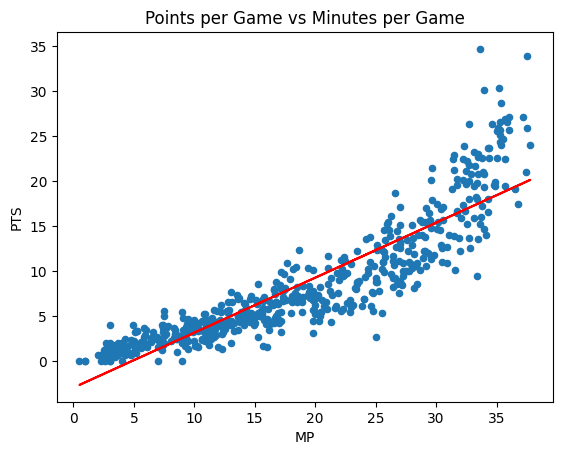

In [728]:
# Let's see how minutes per game and points per game are related!
df.plot.scatter(x="MP", y="PTS", title="Points per Game vs Minutes per Game")
slope, intercept = np.polyfit(df['MP'], df['PTS'], 1)
best_fit_line = slope * df['MP'] + intercept
plt.plot(df['MP'], best_fit_line, color='red', label='Best Fit Line')
plt.show()

In [729]:
#Let's see all the players who is above the line of the best fit
df[((df["PTS"]-intercept)/df["MP"]) > slope]

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,PPS,TS%
1,Bam Adebayo,26,MIA,C,71,71,34.0,7.5,14.3,0.521,0.2,0.6,0.357,7.3,13.7,0.528,0.529,4.1,5.5,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3,DPOY-3 AS,1.06,0.577
6,Jarrett Allen,25,CLE,C,77,77,31.7,6.7,10.6,0.634,0.0,0.1,0.000,6.7,10.6,0.638,0.634,3.0,4.1,0.742,3.2,7.4,10.5,2.7,0.7,1.1,1.6,1.9,16.5,DPOY-10,1.26,0.665
10,Giannis Antetokounmpo,29,MIL,PF,73,73,35.2,11.5,18.8,0.611,0.5,1.7,0.274,11.0,17.1,0.645,0.624,7.0,10.7,0.657,2.7,8.8,11.5,6.5,1.2,1.1,3.4,2.9,30.4,MVP-4 DPOY-9 CPOY-12 AS NBA1,1.25,0.647
11,Thanasis Antetokounmpo,31,MIL,PF,34,0,4.6,0.5,0.9,0.533,0.0,0.0,0.000,0.5,0.9,0.552,0.533,0.0,0.1,0.000,0.2,0.2,0.4,0.5,0.2,0.1,0.4,0.7,0.9,NaN,1.11,0.477
12,Cole Anthony,23,ORL,PG,81,0,22.4,4.1,9.4,0.435,1.1,3.4,0.338,3.0,6.0,0.490,0.496,2.2,2.7,0.826,0.8,3.0,3.8,2.9,0.8,0.5,1.6,2.2,11.6,NaN,0.99,0.548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,Dylan Windler,27,NYK LAL ATL,SF,17,0,6.4,0.9,1.8,0.500,0.8,1.6,0.481,0.1,0.2,0.667,0.717,0.0,0.0,NaN,0.2,0.8,0.9,0.6,0.1,0.0,0.1,0.4,2.5,NaN,1.44,0.694
564,Isaiah Wong,23,IND,SG,1,0,4.0,1.0,3.0,0.333,0.0,1.0,0.000,1.0,2.0,0.500,0.333,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,0.67,0.333
568,Trae Young,25,ATL,PG,54,54,36.0,8.0,18.7,0.430,3.2,8.7,0.373,4.8,10.0,0.479,0.516,6.4,7.5,0.855,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7,AS,1.03,0.584
569,Omer Yurtseven,25,UTA,C,48,12,11.4,2.1,3.8,0.538,0.1,0.5,0.208,2.0,3.3,0.588,0.552,0.4,0.6,0.679,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6,NaN,1.13,0.566


We can see that there is a lot of variance in the types of players here. There are players that play 3 minutes per game, and others that play 30. It's probably best for us to narrow it down to players that a decent amount of minutes (at least 20 per game) to find those who are consistently scoring the ball well.

In [730]:
df[(((df["PTS"]-intercept)/df["MP"]) > slope) & (df["MP"] > 20)]

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,PPS,TS%
1,Bam Adebayo,26,MIA,C,71,71,34.0,7.5,14.3,0.521,0.2,0.6,0.357,7.3,13.7,0.528,0.529,4.1,5.5,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3,DPOY-3 AS,1.06,0.577
6,Jarrett Allen,25,CLE,C,77,77,31.7,6.7,10.6,0.634,0.0,0.1,0.000,6.7,10.6,0.638,0.634,3.0,4.1,0.742,3.2,7.4,10.5,2.7,0.7,1.1,1.6,1.9,16.5,DPOY-10,1.26,0.665
10,Giannis Antetokounmpo,29,MIL,PF,73,73,35.2,11.5,18.8,0.611,0.5,1.7,0.274,11.0,17.1,0.645,0.624,7.0,10.7,0.657,2.7,8.8,11.5,6.5,1.2,1.1,3.4,2.9,30.4,MVP-4 DPOY-9 CPOY-12 AS NBA1,1.25,0.647
12,Cole Anthony,23,ORL,PG,81,0,22.4,4.1,9.4,0.435,1.1,3.4,0.338,3.0,6.0,0.490,0.496,2.2,2.7,0.826,0.8,3.0,3.8,2.9,0.8,0.5,1.6,2.2,11.6,NaN,0.99,0.548
19,Marvin Bagley III,24,DET WAS,C,50,25,21.1,4.8,8.2,0.586,0.2,0.5,0.391,4.6,7.7,0.597,0.597,1.9,2.5,0.762,2.6,3.6,6.2,1.1,0.4,0.7,1.2,1.6,11.7,NaN,1.20,0.629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,Victor Wembanyama,20,SAS,C,71,71,29.7,7.8,16.7,0.465,1.8,5.5,0.325,6.0,11.2,0.534,0.519,4.1,5.2,0.796,2.3,8.4,10.6,3.9,1.2,3.6,3.7,2.2,21.4,ROY-1 DPOY-2,1.04,0.564
538,Russell Westbrook,35,LAC,PG,68,11,22.5,4.4,9.8,0.454,0.6,2.3,0.273,3.8,7.5,0.509,0.486,1.6,2.4,0.688,1.4,3.7,5.0,4.5,1.1,0.3,2.1,1.8,11.1,6MOY-7,0.96,0.511
549,Jalen Williams,22,OKC,PF,71,71,31.3,7.5,14.0,0.540,1.5,3.4,0.427,6.1,10.6,0.576,0.592,2.5,3.1,0.814,0.5,3.5,4.0,4.5,1.1,0.6,1.7,2.5,19.1,CPOY-12,1.19,0.622
559,Zion Williamson,23,NOP,PF,70,70,31.5,8.9,15.6,0.570,0.1,0.3,0.333,8.8,15.4,0.574,0.573,5.0,7.1,0.702,1.7,4.1,5.8,5.0,1.1,0.7,2.8,2.3,22.9,NaN,1.15,0.612


In [731]:
intercept

np.float64(-2.984901979397808)

In [732]:
#Let's list all the players
df[(((df["PTS"]-intercept)/df["MP"]) > slope) & (df["MP"] > 20)]["Player"].unique()

array(['Bam Adebayo', 'Jarrett Allen', 'Giannis Antetokounmpo',
       'Cole Anthony', 'Marvin Bagley III', 'LaMelo Ball',
       'Paolo Banchero', 'Desmond Bane', 'Scottie Barnes', 'RJ Barrett',
       'Bradley Beal', 'Bogdan Bogdanović', 'Bojan Bogdanović',
       'Devin Booker', 'Mikal Bridges', 'Miles Bridges',
       'Malcolm Brogdon', 'Jaylen Brown', 'Jalen Brunson', 'Jimmy Butler',
       'Brandon Clarke', 'Jordan Clarkson', 'John Collins',
       'Zach Collins', 'Cade Cunningham', 'Stephen Curry',
       'Anthony Davis', 'DeMar DeRozan', 'Donte DiVincenzo',
       'Luka Dončić', 'Kevin Durant', 'Anthony Edwards', 'Joel Embiid',
       "De'Aaron Fox", 'Darius Garland', 'Paul George',
       'Shai Gilgeous-Alexander', 'Jerami Grant', 'Jalen Green',
       'Rui Hachimura', 'Tyrese Haliburton', 'Tim Hardaway Jr.',
       'Tyler Herro', 'Chet Holmgren', "De'Andre Hunter",
       'Brandon Ingram', 'Kyrie Irving', 'Jaden Ivey', 'GG Jackson II',
       'Jaren Jackson Jr.', 'LeBron Jame

**Conclusion: Since these players score the ball at an above-average rate when they are playing and play at least 15 minutes per game, we can consider these players to be above-average scorers.**

It's interesting because there a lot of players that I wouldn't consider to be a "scorer", for example Marvin Bagley, Nikola Vucevic, and Keldon Johnson. But this is most likely because this based on who is above average.

## Section 3.2: Making a distribution of "Scoring Indices"

The idea is to take the idea in Section 3.1 and maybe do some percentile calculations.

In [733]:
from scipy.stats import norm

#Make scoring index - Points per Minute
df["PPM"] = (df["PTS"])/df["MP"]
df.head(10)

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,PPS,TS%,PPM
0,Precious Achiuwa,24,TOR NYK,PF,74,18,21.9,3.2,6.3,0.501,0.4,1.3,0.268,2.8,5.0,0.562,0.529,0.9,1.5,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6,NaN,1.08,0.546,0.347032
1,Bam Adebayo,26,MIA,C,71,71,34.0,7.5,14.3,0.521,0.2,0.6,0.357,7.3,13.7,0.528,0.529,4.1,5.5,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3,DPOY-3 AS,1.06,0.577,0.567647
2,Ochai Agbaji,23,UTA TOR,SG,78,28,21.0,2.3,5.6,0.411,0.8,2.7,0.294,1.5,2.8,0.523,0.483,0.5,0.7,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8,NaN,0.96,0.491,0.276190
3,Santi Aldama,23,MEM,PF,61,35,26.5,4.0,9.3,0.435,1.7,5.0,0.349,2.3,4.3,0.534,0.528,0.9,1.4,0.621,1.2,4.6,5.8,2.3,0.7,0.9,1.1,1.5,10.7,NaN,1.04,0.540,0.403774
4,Nickeil Alexander-Walker,25,MIN,SG,82,20,23.4,2.9,6.6,0.439,1.6,4.1,0.391,1.3,2.5,0.517,0.560,0.6,0.8,0.800,0.4,1.6,2.0,2.5,0.8,0.5,0.9,1.7,8.0,NaN,1.12,0.575,0.341880
5,Grayson Allen,28,PHO,SG,75,74,33.5,4.5,9.1,0.499,2.7,5.9,0.461,1.8,3.2,0.570,0.649,1.7,2.0,0.878,0.6,3.3,3.9,3.0,0.9,0.6,1.3,2.1,13.5,NaN,1.29,0.676,0.402985
6,Jarrett Allen,25,CLE,C,77,77,31.7,6.7,10.6,0.634,0.0,0.1,0.000,6.7,10.6,0.638,0.634,3.0,4.1,0.742,3.2,7.4,10.5,2.7,0.7,1.1,1.6,1.9,16.5,DPOY-10,1.26,0.665,0.520505
7,Timmy Allen,24,MEM,SF,5,0,25.0,1.2,4.6,0.261,0.0,1.4,0.000,1.2,3.2,0.375,0.261,0.2,0.4,0.500,0.8,2.6,3.4,1.0,0.8,0.0,0.4,3.6,2.6,NaN,0.52,0.272,0.104000
8,Jose Alvarado,25,NOP,PG,56,0,18.4,2.5,6.2,0.412,1.4,3.7,0.377,1.1,2.5,0.464,0.525,0.6,0.9,0.673,0.4,1.8,2.3,2.1,1.1,0.3,0.7,1.6,7.1,6MOY-6,1.03,0.538,0.385870
9,Kyle Anderson,30,MIN,PF,79,10,22.6,2.5,5.5,0.460,0.1,0.6,0.229,2.4,4.9,0.488,0.472,1.2,1.7,0.708,0.8,2.7,3.5,4.2,0.9,0.6,1.2,1.6,6.4,NaN,0.93,0.512,0.283186


<Axes: title={'center': 'Histogram of Scoring Indices'}, xlabel='PPM', ylabel='Frequency'>

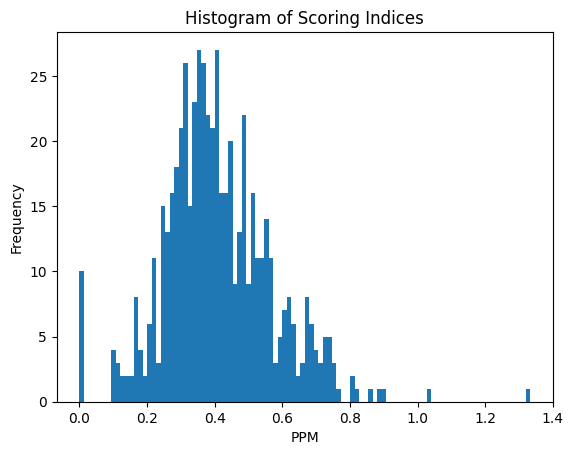

In [734]:
#plot it with a histogram
plot = df["PPM"].plot.hist(bins= 100, xlabel="PPM", title = "Histogram of Scoring Indices")
plot

In [735]:
# Let's figure out what the outliers are
upper = 1.5*(df["PPM"].quantile(0.75)-df["PPM"].quantile(0.25)) + df["PPM"].quantile(0.75)
lower = df["PPM"].quantile(0.25) - 1.5*(df["PPM"].quantile(0.75)-df["PPM"].quantile(0.25))
print("upper bound: " + str(upper))
print("lower bound: " + str(lower))

upper bound: 0.7884615384615384
lower bound: 0.019230769230769273


In [736]:
df[(df["PPM"] > upper)]

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,PPS,TS%,PPM
10,Giannis Antetokounmpo,29,MIL,PF,73,73,35.2,11.5,18.8,0.611,0.5,1.7,0.274,11.0,17.1,0.645,0.624,7.0,10.7,0.657,2.7,8.8,11.5,6.5,1.2,1.1,3.4,2.9,30.4,MVP-4 DPOY-9 CPOY-12 AS NBA1,1.25,0.647,0.863636
63,Izaiah Brockington,24,NOP,PG,1,0,3.0,2.0,5.0,0.400,0.0,1.0,0.000,2.0,4.0,0.500,0.400,0.0,0.0,NaN,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,NaN,0.80,0.400,1.333333
75,Jalen Brunson,27,NYK,PG,77,77,35.4,10.3,21.4,0.479,2.7,6.8,0.401,7.5,14.6,0.516,0.543,5.5,6.5,0.847,0.6,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7,MVP-5 CPOY-5 AS NBA2,1.08,0.592,0.810734
113,Stephen Curry,35,GSW,PG,74,74,32.7,8.8,19.5,0.450,4.8,11.8,0.408,4.0,7.7,0.515,0.573,4.0,4.4,0.923,0.5,4.0,4.5,5.1,0.7,0.4,2.8,1.6,26.4,CPOY-1 AS NBA3,1.15,0.616,0.807339
127,Luka Dončić,24,DAL,PG,70,70,37.5,11.5,23.6,0.487,4.1,10.6,0.382,7.4,13.0,0.573,0.573,6.8,8.7,0.786,0.8,8.4,9.2,9.8,1.4,0.5,4.0,2.1,33.9,MVP-3 CPOY-6 AS NBA1,1.15,0.618,0.904000
142,Joel Embiid,29,PHI,C,39,39,33.6,11.5,21.8,0.529,1.4,3.6,0.388,10.2,18.3,0.556,0.561,10.2,11.6,0.883,2.4,8.6,11.0,5.6,1.2,1.7,3.8,2.9,34.7,AS,1.13,0.645,1.032738
164,Luka Garza,25,MIN,C,25,0,4.9,1.4,3.0,0.480,0.4,1.3,0.281,1.1,1.7,0.628,0.540,0.7,1.0,0.720,0.8,0.5,1.2,0.2,0.2,0.0,0.2,1.0,4.0,NaN,1.13,0.581,0.816327
171,Shai Gilgeous-Alexander,25,OKC,PG,75,75,34.0,10.6,19.8,0.535,1.3,3.6,0.353,9.3,16.2,0.576,0.567,7.6,8.7,0.874,0.9,4.7,5.5,6.2,2.0,0.9,2.2,2.5,30.1,MVP-2 DPOY-7 CPOY-3 AS NBA1,1.14,0.637,0.885294


There are a couple of players with high scoring indexes but play low minutes (Izaiah Brockington and Luka Garza). But we can consider everyone else on this list to be the best of the best. Also, Joel Embiid averaging more points than minutes is absolutely absurd. If he stayed healthy, he definitely would've won the MVP award.

In [737]:
# These are the worst of the worst
df[(df["PPM"] <= lower)]

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,PPS,TS%,PPM
14,Ryan Arcidiacono,29,NYK,PG,20,0,2.3,0.0,0.3,0.0,0.0,0.3,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.4,0.4,0.2,0.1,0.0,0.1,0.3,0.0,NaN,0.0,0.0,0.0
91,Malcolm Cazalon,22,DET,SG,1,0,3.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
110,Jalen Crutcher,24,NOP,PG,1,0,3.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
158,Andrew Funk,24,CHI,SG,5,0,2.6,0.0,0.8,0.0,0.0,0.6,0.0,0.0,0.2,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.2,0.2,0.0,0.0,0.0,NaN,0.0,0.0,0.0
165,Kaiser Gates,27,NOP,SF,1,0,7.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
183,Danny Green,36,PHI,SG,2,0,9.0,0.0,1.0,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,NaN,0.0,1.0,1.0,0.5,0.5,0.0,0.0,0.5,0.0,NaN,0.0,0.0,0.0
200,Ron Harper Jr.,23,TOR,PF,1,0,4.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,NaN,NaN,NaN,0.0
245,Justin Jackson,28,MIN,SF,2,0,0.5,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
467,Dmytro Skapintsev,25,NYK,C,2,0,1.0,0.0,0.5,0.0,0.0,0.0,NaN,0.0,0.5,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
469,Javonte Smart,24,PHI,PG,1,0,1.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0


All of these players had scoring indexes of 0 (the low outlier was 0.019) and played very few minutes. Shout out to Ryan Arcidiacono who played 20 games but didn't score a single point. 

#### Example: Top 10% of scorers by scoring index vs top 10% of scorers by Points Per Game

In [738]:
top_10_index = df[df["PPM"] >= df["PPM"].quantile(0.9)]
top_10_index

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,PPS,TS%,PPM
10,Giannis Antetokounmpo,29,MIL,PF,73,73,35.2,11.5,18.8,0.611,0.5,1.7,0.274,11.0,17.1,0.645,0.624,7.0,10.7,0.657,2.7,8.8,11.5,6.5,1.2,1.1,3.4,2.9,30.4,MVP-4 DPOY-9 CPOY-12 AS NBA1,1.25,0.647,0.863636
22,LaMelo Ball,22,CHO,PG,22,22,32.3,8.3,19.2,0.433,3.2,9.0,0.355,5.1,10.3,0.500,0.515,4.1,4.7,0.865,1.3,3.8,5.1,8.0,1.8,0.2,3.8,3.6,23.9,NaN,1.03,0.562,0.739938
24,Paolo Banchero,21,ORL,PF,80,80,35.0,8.0,17.6,0.455,1.5,4.4,0.339,6.5,13.2,0.493,0.497,5.1,7.0,0.725,1.0,5.9,6.9,5.4,0.9,0.6,3.1,1.9,22.6,AS,0.99,0.546,0.645714
25,Desmond Bane,25,MEM,SG,42,42,34.4,8.6,18.5,0.464,3.3,8.6,0.381,5.3,9.9,0.536,0.552,3.3,3.8,0.870,0.9,3.5,4.4,5.5,1.0,0.5,2.7,2.9,23.7,NaN,1.11,0.587,0.688953
30,RJ Barrett,23,NYK TOR,SG,58,58,31.7,7.5,15.2,0.495,1.6,4.3,0.360,6.0,10.9,0.549,0.547,3.6,5.0,0.715,0.9,4.5,5.4,3.3,0.5,0.4,2.2,2.2,20.2,NaN,1.11,0.580,0.637224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,Cam Whitmore,19,HOU,SF,47,2,18.7,4.5,9.9,0.454,1.7,4.7,0.359,2.8,5.3,0.538,0.539,1.6,2.4,0.679,0.9,2.9,3.8,0.7,0.6,0.4,1.0,1.4,12.3,NaN,1.08,0.561,0.657754
545,Lindell Wigginton,25,MIL,PG,3,0,2.7,0.7,1.7,0.400,0.0,0.7,0.000,0.7,1.0,0.667,0.400,0.7,0.7,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.3,2.0,NaN,0.82,0.498,0.740741
559,Zion Williamson,23,NOP,PF,70,70,31.5,8.9,15.6,0.570,0.1,0.3,0.333,8.8,15.4,0.574,0.573,5.0,7.1,0.702,1.7,4.1,5.8,5.0,1.1,0.7,2.8,2.3,22.9,NaN,1.15,0.612,0.726984
560,D.J. Wilson,27,PHI,PF,2,0,7.5,2.0,3.0,0.667,1.0,1.0,1.000,1.0,2.0,0.500,0.833,0.0,0.0,NaN,0.5,0.5,1.0,1.0,0.0,1.0,0.0,0.5,5.0,NaN,1.67,0.833,0.666667


In [739]:
top_10_ppg = df[df["PTS"] >= df["PTS"].quantile(0.9)]
top_10_ppg

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,PPS,TS%,PPM
10,Giannis Antetokounmpo,29,MIL,PF,73,73,35.2,11.5,18.8,0.611,0.5,1.7,0.274,11.0,17.1,0.645,0.624,7.0,10.7,0.657,2.7,8.8,11.5,6.5,1.2,1.1,3.4,2.9,30.4,MVP-4 DPOY-9 CPOY-12 AS NBA1,1.25,0.647,0.863636
22,LaMelo Ball,22,CHO,PG,22,22,32.3,8.3,19.2,0.433,3.2,9.0,0.355,5.1,10.3,0.500,0.515,4.1,4.7,0.865,1.3,3.8,5.1,8.0,1.8,0.2,3.8,3.6,23.9,NaN,1.03,0.562,0.739938
24,Paolo Banchero,21,ORL,PF,80,80,35.0,8.0,17.6,0.455,1.5,4.4,0.339,6.5,13.2,0.493,0.497,5.1,7.0,0.725,1.0,5.9,6.9,5.4,0.9,0.6,3.1,1.9,22.6,AS,0.99,0.546,0.645714
25,Desmond Bane,25,MEM,SG,42,42,34.4,8.6,18.5,0.464,3.3,8.6,0.381,5.3,9.9,0.536,0.552,3.3,3.8,0.870,0.9,3.5,4.4,5.5,1.0,0.5,2.7,2.9,23.7,NaN,1.11,0.587,0.688953
29,Scottie Barnes,22,TOR,SG,60,60,34.9,7.5,15.7,0.475,1.7,4.9,0.341,5.8,10.8,0.536,0.528,3.3,4.2,0.781,2.4,5.9,8.2,6.1,1.3,1.5,2.8,2.0,19.9,AS,1.06,0.567,0.570201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Devin Vassell,23,SAS,SG,68,62,33.1,7.3,15.5,0.472,2.4,6.6,0.372,4.9,9.0,0.544,0.550,2.4,3.0,0.801,0.4,3.4,3.8,4.1,1.1,0.3,1.6,1.1,19.5,NaN,1.10,0.580,0.589124
521,Franz Wagner,22,ORL,SF,72,72,32.5,7.3,15.2,0.482,1.3,4.6,0.281,6.0,10.6,0.570,0.525,3.8,4.4,0.850,1.0,4.3,5.3,3.7,1.1,0.4,1.9,2.3,19.7,NaN,1.05,0.575,0.606154
536,Victor Wembanyama,20,SAS,C,71,71,29.7,7.8,16.7,0.465,1.8,5.5,0.325,6.0,11.2,0.534,0.519,4.1,5.2,0.796,2.3,8.4,10.6,3.9,1.2,3.6,3.7,2.2,21.4,ROY-1 DPOY-2,1.04,0.564,0.720539
559,Zion Williamson,23,NOP,PF,70,70,31.5,8.9,15.6,0.570,0.1,0.3,0.333,8.8,15.4,0.574,0.573,5.0,7.1,0.702,1.7,4.1,5.8,5.0,1.1,0.7,2.8,2.3,22.9,NaN,1.15,0.612,0.726984


In [740]:
# Let's find the people that are in the Index list that aren't in the PPG list
set_index = set(top_10_index["Player"])
set_ppg = set(top_10_ppg["Player"])
set_index-set_ppg

{'Boban Marjanović',
 'Cam Whitmore',
 'Collin Sexton',
 'D.J. Wilson',
 'Dexter Dennis',
 'Izaiah Brockington',
 'Kevon Harris',
 'Lindell Wigginton',
 'Luka Garza',
 'Myles Turner',
 'Oscar Tshiebwe',
 'Terquavion Smith'}

In [741]:
# And the other way around
set_ppg-set_index

{'CJ McCollum',
 'Devin Vassell',
 'Domantas Sabonis',
 'Franz Wagner',
 'Jalen Green',
 'Jerami Grant',
 'Jimmy Butler',
 'Mikal Bridges',
 'Miles Bridges',
 'Scottie Barnes',
 'Terry Rozier',
 'Zach LaVine'}

In [742]:
df[df["Player"] == "Myles Turner"]

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,PPS,TS%,PPM
509,Myles Turner,27,IND,C,77,77,27.0,6.2,11.8,0.524,1.5,4.2,0.358,4.7,7.6,0.615,0.587,3.2,4.1,0.773,1.5,5.5,6.9,1.3,0.5,1.9,1.4,3.0,17.1,NaN,1.18,0.628,0.633333


**Could this show which players are not as efficient as they seem? Potentially. Myles Turner is a player who is in the top 10% in Points per Minute and plays a lot of minutes, which means that he may be a better scorer than some of the players in the players in the top 10% of Points per Game.**

## Section 3.3: Players that play minutes

We've looked at a histogram and a scatterplot of all players. However, we've seen that these visualizations are often affected by players that play little-no minutes in any given game. With this in light, what if we do our same explorations, but with players that play at least **10 minutes per game**. While there are a couple players that will be excluded that were rotation players for these teams (ie. Zeke Nnaji, Kessler Edwards, Anthony Gill), this ensures that we're using players that played a sizeable amount of minutes.

In [743]:
df_10_min = df[df["MP"] >= 10].reset_index()
df_10_min = df_10_min.drop(columns="index")
df_10_min

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,PPS,TS%,PPM
0,Precious Achiuwa,24,TOR NYK,PF,74,18,21.9,3.2,6.3,0.501,0.4,1.3,0.268,2.8,5.0,0.562,0.529,0.9,1.5,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6,NaN,1.08,0.546,0.347032
1,Bam Adebayo,26,MIA,C,71,71,34.0,7.5,14.3,0.521,0.2,0.6,0.357,7.3,13.7,0.528,0.529,4.1,5.5,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3,DPOY-3 AS,1.06,0.577,0.567647
2,Ochai Agbaji,23,UTA TOR,SG,78,28,21.0,2.3,5.6,0.411,0.8,2.7,0.294,1.5,2.8,0.523,0.483,0.5,0.7,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8,NaN,0.96,0.491,0.276190
3,Santi Aldama,23,MEM,PF,61,35,26.5,4.0,9.3,0.435,1.7,5.0,0.349,2.3,4.3,0.534,0.528,0.9,1.4,0.621,1.2,4.6,5.8,2.3,0.7,0.9,1.1,1.5,10.7,NaN,1.04,0.540,0.403774
4,Nickeil Alexander-Walker,25,MIN,SG,82,20,23.4,2.9,6.6,0.439,1.6,4.1,0.391,1.3,2.5,0.517,0.560,0.6,0.8,0.800,0.4,1.6,2.0,2.5,0.8,0.5,0.9,1.7,8.0,NaN,1.12,0.575,0.341880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,Delon Wright,31,WAS MIA,PG,47,1,15.8,1.6,4.0,0.394,0.5,1.4,0.368,1.0,2.6,0.408,0.460,0.8,1.0,0.822,0.4,1.4,1.8,2.5,1.1,0.2,0.3,0.7,4.5,NaN,0.88,0.507,0.284810
441,Thaddeus Young,35,TOR PHO,PF,33,6,13.3,2.0,3.3,0.602,0.0,0.2,0.143,1.9,3.1,0.634,0.606,0.2,0.5,0.400,1.4,1.7,3.1,1.7,0.7,0.2,0.5,1.5,4.2,NaN,1.15,0.597,0.315789
442,Trae Young,25,ATL,PG,54,54,36.0,8.0,18.7,0.430,3.2,8.7,0.373,4.8,10.0,0.479,0.516,6.4,7.5,0.855,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7,AS,1.03,0.584,0.713889
443,Omer Yurtseven,25,UTA,C,48,12,11.4,2.1,3.8,0.538,0.1,0.5,0.208,2.0,3.3,0.588,0.552,0.4,0.6,0.679,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6,NaN,1.13,0.566,0.403509


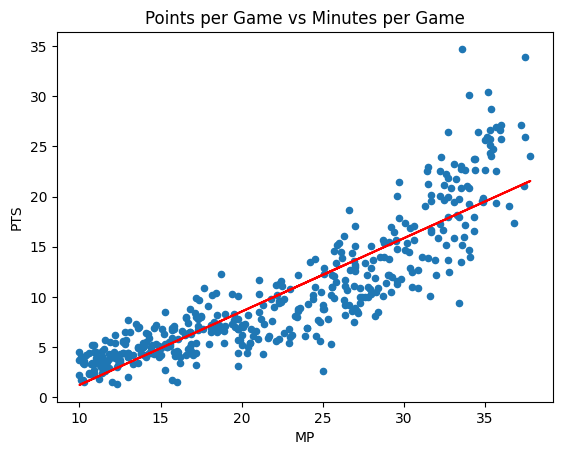

In [744]:
df_10_min.plot.scatter(x="MP", y="PTS", title="Points per Game vs Minutes per Game")
slope, intercept = np.polyfit(df_10_min['MP'], df_10_min['PTS'], 1)
best_fit_line = slope * df_10_min['MP'] + intercept
plt.plot(df_10_min['MP'], best_fit_line, color='red', label='Best Fit Line')
plt.show()

<Axes: title={'center': 'Histogram of Scoring Indices'}, xlabel='PPM', ylabel='Frequency'>

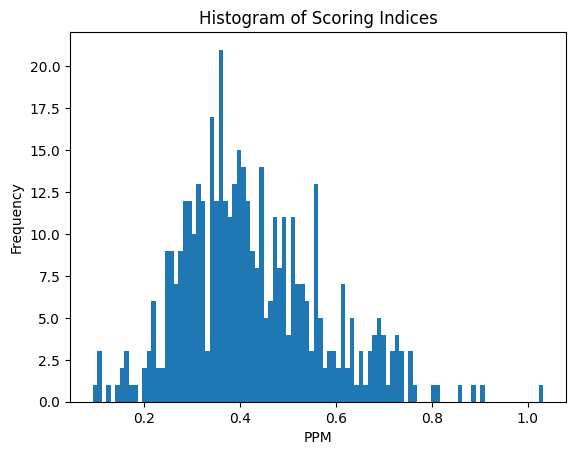

In [745]:
#plot it with a histogram
plot = df_10_min["PPM"].plot.hist(bins= 100, xlabel="PPM", title = "Histogram of Scoring Indices")
plot

In [746]:
#lets figure out the outliers
upper_10_min = 1.5*(df_10_min["PPM"].quantile(0.75)-df_10_min["PPM"].quantile(0.25)) + df_10_min["PPM"].quantile(0.75)
lower_10_min = df_10_min["PPM"].quantile(0.25) - 1.5*(df_10_min["PPM"].quantile(0.75)-df_10_min["PPM"].quantile(0.25))
print("upper bound: " + str(upper_10_min))
print("lower bound: " + str(lower_10_min))

upper bound: 0.7946700009806805
lower bound: 0.035819358634892606


In [747]:
df_10_min[(df_10_min["PPM"] > upper_10_min)]

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,PPS,TS%,PPM
10,Giannis Antetokounmpo,29,MIL,PF,73,73,35.2,11.5,18.8,0.611,0.5,1.7,0.274,11.0,17.1,0.645,0.624,7.0,10.7,0.657,2.7,8.8,11.5,6.5,1.2,1.1,3.4,2.9,30.4,MVP-4 DPOY-9 CPOY-12 AS NBA1,1.25,0.647,0.863636
61,Jalen Brunson,27,NYK,PG,77,77,35.4,10.3,21.4,0.479,2.7,6.8,0.401,7.5,14.6,0.516,0.543,5.5,6.5,0.847,0.6,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7,MVP-5 CPOY-5 AS NBA2,1.08,0.592,0.810734
93,Stephen Curry,35,GSW,PG,74,74,32.7,8.8,19.5,0.450,4.8,11.8,0.408,4.0,7.7,0.515,0.573,4.0,4.4,0.923,0.5,4.0,4.5,5.1,0.7,0.4,2.8,1.6,26.4,CPOY-1 AS NBA3,1.15,0.616,0.807339
102,Luka Dončić,24,DAL,PG,70,70,37.5,11.5,23.6,0.487,4.1,10.6,0.382,7.4,13.0,0.573,0.573,6.8,8.7,0.786,0.8,8.4,9.2,9.8,1.4,0.5,4.0,2.1,33.9,MVP-3 CPOY-6 AS NBA1,1.15,0.618,0.904000
115,Joel Embiid,29,PHI,C,39,39,33.6,11.5,21.8,0.529,1.4,3.6,0.388,10.2,18.3,0.556,0.561,10.2,11.6,0.883,2.4,8.6,11.0,5.6,1.2,1.7,3.8,2.9,34.7,AS,1.13,0.645,1.032738
136,Shai Gilgeous-Alexander,25,OKC,PG,75,75,34.0,10.6,19.8,0.535,1.3,3.6,0.353,9.3,16.2,0.576,0.567,7.6,8.7,0.874,0.9,4.7,5.5,6.2,2.0,0.9,2.2,2.5,30.1,MVP-2 DPOY-7 CPOY-3 AS NBA1,1.14,0.637,0.885294


In [748]:
df_10_min[(df_10_min["PPM"] < lower_10_min)]

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,PPS,TS%,PPM


We can see that our results consists of no lower outliers and 6 upper outliers, which are the same six as before.

#### Now let's do the same comparison as in 3.2

In [749]:
top_10_index_10_min = df_10_min[df_10_min["PPM"] >= df_10_min["PPM"].quantile(0.9)]
top_10_index_10_min

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,PPS,TS%,PPM
10,Giannis Antetokounmpo,29,MIL,PF,73,73,35.2,11.5,18.8,0.611,0.5,1.7,0.274,11.0,17.1,0.645,0.624,7.0,10.7,0.657,2.7,8.8,11.5,6.5,1.2,1.1,3.4,2.9,30.4,MVP-4 DPOY-9 CPOY-12 AS NBA1,1.25,0.647,0.863636
18,LaMelo Ball,22,CHO,PG,22,22,32.3,8.3,19.2,0.433,3.2,9.0,0.355,5.1,10.3,0.500,0.515,4.1,4.7,0.865,1.3,3.8,5.1,8.0,1.8,0.2,3.8,3.6,23.9,NaN,1.03,0.562,0.739938
20,Paolo Banchero,21,ORL,PF,80,80,35.0,8.0,17.6,0.455,1.5,4.4,0.339,6.5,13.2,0.493,0.497,5.1,7.0,0.725,1.0,5.9,6.9,5.4,0.9,0.6,3.1,1.9,22.6,AS,0.99,0.546,0.645714
21,Desmond Bane,25,MEM,SG,42,42,34.4,8.6,18.5,0.464,3.3,8.6,0.381,5.3,9.9,0.536,0.552,3.3,3.8,0.870,0.9,3.5,4.4,5.5,1.0,0.5,2.7,2.9,23.7,NaN,1.11,0.587,0.688953
26,RJ Barrett,23,NYK TOR,SG,58,58,31.7,7.5,15.2,0.495,1.6,4.3,0.360,6.0,10.9,0.549,0.547,3.6,5.0,0.715,0.9,4.5,5.4,3.3,0.5,0.4,2.2,2.2,20.2,NaN,1.11,0.580,0.637224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Myles Turner,27,IND,C,77,77,27.0,6.2,11.8,0.524,1.5,4.2,0.358,4.7,7.6,0.615,0.587,3.2,4.1,0.773,1.5,5.5,6.9,1.3,0.5,1.9,1.4,3.0,17.1,NaN,1.18,0.628,0.633333
417,Victor Wembanyama,20,SAS,C,71,71,29.7,7.8,16.7,0.465,1.8,5.5,0.325,6.0,11.2,0.534,0.519,4.1,5.2,0.796,2.3,8.4,10.6,3.9,1.2,3.6,3.7,2.2,21.4,ROY-1 DPOY-2,1.04,0.564,0.720539
423,Cam Whitmore,19,HOU,SF,47,2,18.7,4.5,9.9,0.454,1.7,4.7,0.359,2.8,5.3,0.538,0.539,1.6,2.4,0.679,0.9,2.9,3.8,0.7,0.6,0.4,1.0,1.4,12.3,NaN,1.08,0.561,0.657754
436,Zion Williamson,23,NOP,PF,70,70,31.5,8.9,15.6,0.570,0.1,0.3,0.333,8.8,15.4,0.574,0.573,5.0,7.1,0.702,1.7,4.1,5.8,5.0,1.1,0.7,2.8,2.3,22.9,NaN,1.15,0.612,0.726984


In [750]:
top_10_ppg_10_min = df_10_min[df_10_min["PTS"] >= df_10_min["PTS"].quantile(0.9)]
top_10_ppg_10_min

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,PPS,TS%,PPM
10,Giannis Antetokounmpo,29,MIL,PF,73,73,35.2,11.5,18.8,0.611,0.5,1.7,0.274,11.0,17.1,0.645,0.624,7.0,10.7,0.657,2.7,8.8,11.5,6.5,1.2,1.1,3.4,2.9,30.4,MVP-4 DPOY-9 CPOY-12 AS NBA1,1.25,0.647,0.863636
18,LaMelo Ball,22,CHO,PG,22,22,32.3,8.3,19.2,0.433,3.2,9.0,0.355,5.1,10.3,0.500,0.515,4.1,4.7,0.865,1.3,3.8,5.1,8.0,1.8,0.2,3.8,3.6,23.9,NaN,1.03,0.562,0.739938
20,Paolo Banchero,21,ORL,PF,80,80,35.0,8.0,17.6,0.455,1.5,4.4,0.339,6.5,13.2,0.493,0.497,5.1,7.0,0.725,1.0,5.9,6.9,5.4,0.9,0.6,3.1,1.9,22.6,AS,0.99,0.546,0.645714
21,Desmond Bane,25,MEM,SG,42,42,34.4,8.6,18.5,0.464,3.3,8.6,0.381,5.3,9.9,0.536,0.552,3.3,3.8,0.870,0.9,3.5,4.4,5.5,1.0,0.5,2.7,2.9,23.7,NaN,1.11,0.587,0.688953
46,Devin Booker,27,PHO,PG,68,68,36.0,9.4,19.2,0.492,2.2,6.1,0.364,7.2,13.0,0.552,0.550,6.0,6.7,0.886,0.8,3.7,4.5,6.9,0.9,0.4,2.6,3.0,27.1,AS NBA3,1.09,0.612,0.752778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,Cam Thomas,22,BRK,SG,66,51,31.4,8.0,18.0,0.442,2.2,6.0,0.364,5.8,12.0,0.481,0.503,4.3,5.1,0.856,0.4,2.8,3.2,2.9,0.7,0.2,1.9,2.1,22.5,NaN,1.01,0.556,0.716561
392,Karl-Anthony Towns,28,MIN,PF,62,62,32.7,7.7,15.3,0.504,2.2,5.3,0.416,5.5,10.1,0.550,0.575,4.1,4.7,0.873,1.5,6.8,8.3,3.0,0.7,0.7,2.9,3.3,21.8,AS,1.15,0.628,0.666667
417,Victor Wembanyama,20,SAS,C,71,71,29.7,7.8,16.7,0.465,1.8,5.5,0.325,6.0,11.2,0.534,0.519,4.1,5.2,0.796,2.3,8.4,10.6,3.9,1.2,3.6,3.7,2.2,21.4,ROY-1 DPOY-2,1.04,0.564,0.720539
436,Zion Williamson,23,NOP,PF,70,70,31.5,8.9,15.6,0.570,0.1,0.3,0.333,8.8,15.4,0.574,0.573,5.0,7.1,0.702,1.7,4.1,5.8,5.0,1.1,0.7,2.8,2.3,22.9,NaN,1.15,0.612,0.726984


In [751]:
set_index_10_min = set(top_10_index_10_min["Player"])
set_ppg_10_min = set(top_10_ppg_10_min["Player"])
set_index_10_min-set_ppg_10_min

{'Cam Whitmore',
 'Collin Sexton',
 'Kristaps Porziņģis',
 'Myles Turner',
 'RJ Barrett'}

In [752]:
set_ppg_10_min-set_index_10_min

{'Brandon Ingram',
 'Dejounte Murray',
 'Jerami Grant',
 'Jimmy Butler',
 'Miles Bridges',
 'Tyler Herro'}

**From this, we can find that some players play both meaningful amounts of minutes and are more efficient scorers per minute. Cam Whitmore, Collin Sexton, Kristaps Porzingis, Myles Turner, and RJ Barrett have higher points per minute than Brandon Ingram, Dejounte Murray, Jerami Grant, Jimmy Butler, Miles Bridges, and Tyler Herro.**

<hr style="color: #FFFFFF;">

# Section 4: What's Next for Part II

### Observations:

- In some cases, players that have played little-no minutes can skew data and cause extreme outliers due to their low amount of playtime
- Efficiency can be measured in many ways, but not every method is effective as measuring how good a player is.
- There are always going to be statistical anomalies, such as Buddy Hield playing 84 games in an 82-game season

### What do I want to do for Part II?

**Essentially,** I want to find out the most effective offensive player for a team. I want to find the most efficient player that also plays has the highest volume. We saw earlier that players such as Stephen Curry had very high points per minute, but is that the best metric for us to use? I want to explore and have fun with that. I also want to use team data to explore the player's individual impact on that team.

<hr style="color: #FFFFFF;">

# Section 5: Data Science

After thinking about my efficiency question, I realized that finding "efficiency" is always a relative statistic. There are many statistics that can show efficiency, but I think I would rather do comparative statistics.

With that, here is my question:

**Is it possible to predict the statistics (Points, Assists, Rebounds, Steals, Blocks per game) of a player based the number of minutes that a player played?**

## Plan: Use a Linear Regression model to predict the main statistics of any players given that we know their minutes per game.

**I'm actually doing fantasy basketball right now, and on ESPN's fantasy platform, they weight statistics like this:** <br>
Points: 1 <br>
Assists: 2<br>
Rebounds: 1<br>
Steals: 4<br>
Blocks: 4<br>
Turnovers: -2<br>
Field Goals Made: 2<br>
Field Goals attempted: -1<br>
Free Throws Made: 1<br>
Free Throws Attempted: -1<br>
Three Pointers Made: 1

**They add up these values using this weightage to create a total value. I'm going to use this metric, and while it isn't perfect, it's something that I can easily model and use.**

In [753]:
df["Fantasy Score"] = df["PTS"] + 2*df["AST"] + df["TRB"] + 4*df["STL"] + 4*df["BLK"] - 2*df["TOV"] + 2*df["FG"] - df["FGA"] + df["FT"] - df["FTA"] + df["3P"]
df["FSPM"] = df["Fantasy Score"]/df["MP"]
df.sample(10)

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,PPS,TS%,PPM,Fantasy Score,FSPM
186,Javonte Green,30,CHI,SF,9,5,25.6,5.0,8.3,0.600,1.1,3.0,0.370,3.9,5.3,0.729,0.667,1.1,1.4,0.769,2.2,5.2,7.4,0.6,1.1,0.9,0.8,2.1,12.2,NaN,1.34,0.684,0.476562,29.7,1.160156
119,DeMar DeRozan,34,CHI,SF,79,79,37.8,8.2,17.2,0.480,0.9,2.8,0.333,7.3,14.3,0.509,0.507,6.6,7.7,0.853,0.5,3.8,4.3,5.3,1.1,0.6,1.7,2.0,24.0,CPOY-2,1.01,0.583,0.634921,41.3,1.092593
373,Daishen Nix,21,MIN,PG,15,0,3.3,0.6,1.6,0.375,0.4,1.1,0.353,0.2,0.5,0.429,0.500,0.2,0.4,0.500,0.1,0.1,0.2,0.4,0.3,0.0,0.3,0.1,1.8,NaN,1.00,0.507,0.545455,3.2,0.969697
170,Harry Giles,25,BRK LAL,C,23,0,4.3,1.0,2.2,0.460,0.1,0.6,0.214,0.9,1.6,0.556,0.490,0.3,0.6,0.538,0.5,0.8,1.3,0.3,0.1,0.1,0.3,0.7,2.4,NaN,0.95,0.487,0.558140,4.1,0.953488
123,Gradey Dick,20,TOR,SG,60,17,21.1,3.2,7.4,0.425,1.5,4.0,0.365,1.7,3.4,0.495,0.524,0.7,0.9,0.863,0.5,1.8,2.2,1.1,0.6,0.0,0.8,1.5,8.5,NaN,1.07,0.545,0.402844,14.0,0.663507
56,James Bouknight,23,CHO,SG,14,0,5.8,1.3,2.9,0.439,0.9,2.1,0.433,0.4,0.8,0.455,0.598,0.1,0.1,0.500,0.1,0.6,0.6,0.4,0.1,0.1,0.1,0.2,3.6,NaN,1.21,0.611,0.620690,6.2,1.068966
348,Davion Mitchell,25,SAC,PG,72,4,15.3,2.0,4.5,0.452,0.8,2.2,0.361,1.2,2.3,0.539,0.540,0.4,0.6,0.714,0.3,1.1,1.3,1.9,0.2,0.0,0.6,1.2,5.3,NaN,1.07,0.556,0.346405,10.1,0.660131
560,D.J. Wilson,27,PHI,PF,2,0,7.5,2.0,3.0,0.667,1.0,1.0,1.000,1.0,2.0,0.500,0.833,0.0,0.0,NaN,0.5,0.5,1.0,1.0,0.0,1.0,0.0,0.5,5.0,NaN,1.67,0.833,0.666667,14.0,1.866667
544,Andrew Wiggins,28,GSW,SF,71,59,27.0,5.0,11.0,0.453,1.3,3.6,0.358,3.7,7.4,0.498,0.511,2.0,2.7,0.751,1.5,3.0,4.5,1.7,0.6,0.6,1.2,2.1,13.2,NaN,1.03,0.542,0.488889,23.1,0.855556
326,CJ McCollum,32,NOP,PG,66,66,32.7,7.3,16.0,0.459,3.6,8.4,0.429,3.7,7.5,0.492,0.572,1.7,2.1,0.827,0.6,3.7,4.3,4.6,0.9,0.6,1.7,1.9,20.0,NaN,1.14,0.591,0.611621,37.9,1.159021


#### **Time to make the model!**

Note: I am splitting into test and train

In [754]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [755]:
model = LinearRegression()
#X = minutes
#Y = Fantasy Score
train, test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=133)
print("train size: ", (len(df)*0.8).__round__(0))
print("test size: ", (len(df)*0.2).__round__(0))

train size:  458.0
test size:  114.0


In [756]:
model = model.fit(train[["MP"]], train["Fantasy Score"])

In [757]:
test["Fantasy Predict"] = model.predict(test[["MP"]])

In [758]:
test[["MP", "Fantasy Predict"]].sample(10)

,MP,Fantasy Predict
445,4.3,1.195030
116,12.3,10.516682
155,18.3,17.507921
361,29.6,30.674755
286,13.6,12.031450
405,31.7,33.121689
347,2.8,-0.552780
535,18.6,17.857483
50,25.9,26.363491
122,2.5,-0.902342


Above are 10 examples of predictions. Now, I wanna see how good this linear regression is using r-squared and RSME.

In [759]:
from sklearn.metrics import mean_squared_error, r2_score

In [760]:
rmse = mean_squared_error(test["Fantasy Score"], test["Fantasy Predict"])
r_squared = r2_score(test["Fantasy Score"], test["Fantasy Predict"])
corr = test[["MP", "Fantasy Score"]].corr()

slope = model.coef_
model_inter = model.intercept_

In [761]:
print("RMSE: ", rmse)
print("R Squared: ", r_squared)
print("Correlation Coeff: ", corr.iat[1, 0])
print("Regression Equation: y = " + slope.round(3).astype(str) + "x + " + model_inter.round(3).astype(str))

RMSE:  30.36331169405124
R Squared:  0.8271647590309423
Correlation Coeff:  0.9097658321831811
['Regression Equation: y = 1.165x + -3.815']


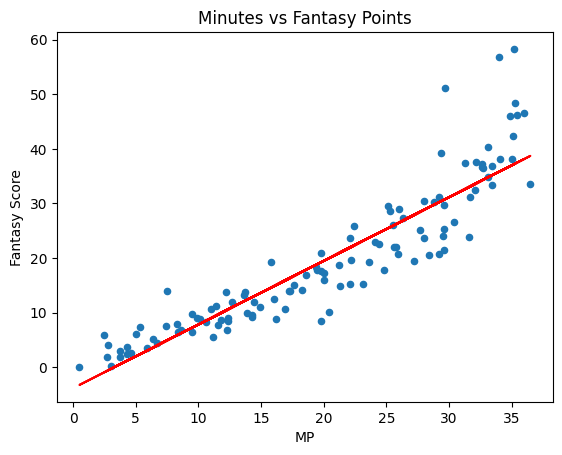

In [762]:
test.plot.scatter(x="MP", y="Fantasy Score", title="Minutes vs Fantasy Points")
plt.plot(test["MP"], test["Fantasy Predict"], color='red', label='Regression Line')
plt.show()

In [763]:
#Let's predict the average score for our old friend from Part 1: Buddy Hield

df[["Player", "Pos", "MP"]][df.Player == "Buddy Hield"]

,Player,Pos,MP
216,Buddy Hield,SF,25.7


In [764]:
#His MP was 25.7:

model.predict([[25.7]])

/usr/local/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([26.13044935])

In [765]:
#We got a predicted fantasy score of 26.13

df[["Player", "Fantasy Score"]][df.Player == "Buddy Hield"]

,Player,Fantasy Score
216,Buddy Hield,24.9


His actual fantasy score was 24.9, which is pretty close to the 26.13 that we predicted.

**From this, we can see that there is a very strong correlation between Minutes Played and Fantasy Score. As Minutes Played increases, Fantasy Score increases. However, this isn't surprising, because as players play more minutes, they should score higher in fantasy.**

This doesn't answer any question for me. So, I want to see if the players that play more minutes get more points per minute.

In [766]:
model_pg = LinearRegression()
#X = minutes
#Y = FSPM
train_pg, test_pg = train_test_split(df, train_size=0.8, test_size=0.2, random_state=300)
model_pg = model_pg.fit(train_pg[["MP"]], train_pg["FSPM"])
test_pg["FSPM Predict"] = model_pg.predict(test_pg[["MP"]])

rmse_pg = mean_squared_error(test_pg["FSPM"], test_pg["FSPM Predict"])
r_squared2 = r2_score(test_pg["FSPM"], test_pg["FSPM Predict"])
corr_pg = test_pg[["MP", "FSPM"]].corr()
slope_pg = model_pg.coef_
model_inter_pg = model_pg.intercept_

print("RMSE: ", rmse_pg)
print("R Squared: ", r_squared2)
print("Correlation Coeff: ", corr_pg.iat[1, 0])
print("Regression Equation: y = " + slope_pg.round(3).astype(str) + "x + " + model_inter_pg.round(3).astype(str))

RMSE:  0.06156308037637978
R Squared:  0.19930089197320489
Correlation Coeff:  0.4472438994162952
['Regression Equation: y = 0.012x + 0.672']


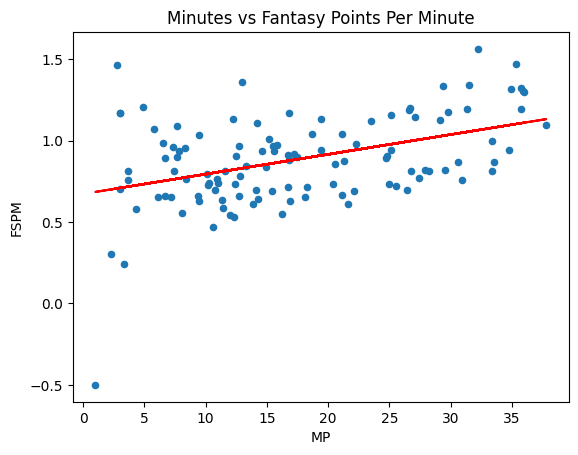

In [767]:
test_pg.plot.scatter(x="MP", y="FSPM", title="Minutes vs Fantasy Points Per Minute")
plt.plot(test_pg["MP"], test_pg["FSPM Predict"], color='red', label='Regression Line')
plt.show()

Since the correlation coefficient is only around 0.45, that means that generally, the number of fantasy points per minute that a player gets increases as a player plays more minutes. I believe that this number would be higher if we excluded the outliers. **The fact that there is still a positive correlation tells me that the players that generally get more minutes are the ones that are more impactful on the court.**

<hr style="color: #FFFFFF;">

# Section 6: A Different Data Visualization

Piggybacking off of my conclusion to the end of Part 5, I want to visualize the distribution of Fantasy Points Per Minute values and also the differences between the predicted and actual fantasy score values.

<Axes: title={'center': 'Fantasy Score Per Minute Values'}, xlabel='FSPM', ylabel='Frequency'>

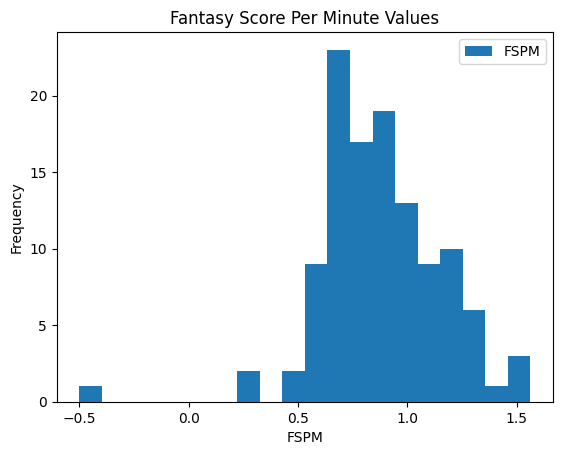

In [768]:
test_pg[["FSPM"]].plot.hist(bins=20, title="Fantasy Score Per Minute Values", xlabel="FSPM")

<Axes: title={'center': 'Fantasy Score Per Minute Residual'}, xlabel='FSPM Actual - FSPM Predicted', ylabel='Frequency'>

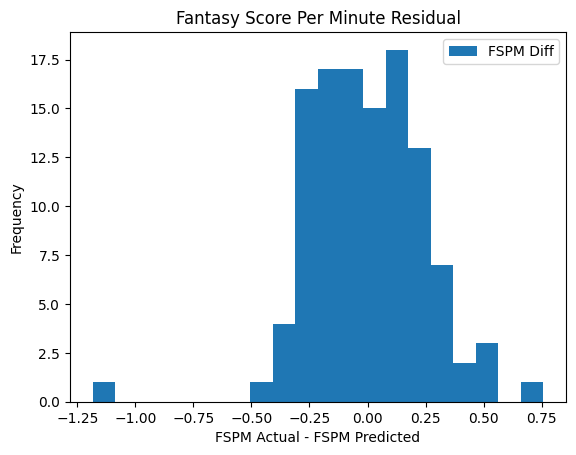

In [769]:
test_pg["FSPM Diff"] = test_pg["FSPM"]-test_pg["FSPM Predict"]
test_pg[["FSPM Diff"]].plot.hist(bins=20, title="Fantasy Score Per Minute Residual", xlabel="FSPM Actual - FSPM Predicted")

In the end, we can see that the difference between the actual and predicted values most nearly show a normal distribution that is centered around 0, with a low-end outlier at around -1.2 and a high-end outlier at around 0.75. I think that it shows that we can use the linear regression model to predict fantasy scores based on number of minutes per game that a player played.

<hr style="color: #FFFFFF;">

# Section 7: Summary

This section will consist of a few findings and a few paragraphs of summary for this project.

**First,** I want to how a star player (such as Stephen Curry) fits in the model.

Stephen Curry played an average of 32.7 minutes per game.

In [770]:
model.predict([[32.7]]).item()

/usr/local/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


34.28689508728499

The model predicted that Stephen Curry had an average fantasy score of 34.29 points. How accurate is this prediction to his actual average fantasy score?

In [771]:
df[["Player", "Fantasy Score"]][df["Player"] == "Stephen Curry"]

,Player,Fantasy Score
113,Stephen Curry,42.4


Let's do the same with Kentavious Caldwell-Pope, who averaged 31.6 minutes per game last season.

In [772]:
model.predict([[31.6]])

/usr/local/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([33.0051679])

In [773]:
df[["Player", "Fantasy Score"]][df["Player"] == "Kentavious Caldwell-Pope"]

,Player,Fantasy Score
83,Kentavious Caldwell-Pope,23.8


## Conclusion:

In this project, I discovered two findings through the NBA Player Statistics from the 2023-24 season. I used the metric of fantasy basketball score to determine the average amount of "statistics" that a player gets per game (as Fantasy Score). As a result, I wanted to be able to predict the **average number of fantasy points that a player got** based on the **number of minutes they played** and I wanted to find out if the players that played more minutes were more impactful statistically. 

I first constructed a **Fantasy Score** column in my player data DataFrame using a formula for Fantasy Score. I used this data to construct simple linear regression. I found that the correlation coefficient between Minutes Per Game and Fantasy Score was **0.91**, meaning that there is a strong positive correlation between Minutes and Fantasy Score. As a result, I think that I can use Minutes Per Game as a good way to predict Fantasy Score. I then expanded on this by figuring out if players that played more minutes we're more "impactful" statistically. I did this by constructing a **Fantasy Score Per Minute** column (Fantasy Score / MP), and running a simple linear regression between Minutes Per Game and FSPM. I found that there is a much lower correlation between Minutes Played and FSPM (at 0.45), but there is still a noticeable positive correlation. This means that generally, the more minutes that a player plays, that player will be more impactful in the minutes that they play.

In the first part of Section 7, I showed the predicted fantasy scores for Stephen Curry and Kentavious Caldwell-Pope. It showed that even though both players played similar amounts of minutes (32.7 vs. 31.6), Stephen Curry's fantasy points per game was significantly hgiher than Kentavious Caldwell-Pope (42.4 vs. 23.8). Due to these differences, the model predicts that the fantasy score for these players is in the middle, at around 33 or 34 points per game for a player that plays the amount of minutes that these two players play. Unfortunately, the model is limited in this way, but I feel that it is still a good predictor.